In [188]:
# IMPORTING ALL REQUIRED LIBRALIES TO BE USED IN OUR PROJECT OF BREAST CANCER TESTING IN THE TUMOR

import pandas as pd 
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


# Load your dataset
warnings.filterwarnings('ignore')
data=pd.read_csv("data.csv")
data.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [172]:
#  Naming features and target
y = data['diagnosis']  # Target
X = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']]
data = data.dropna(axis=1, how='all')

In [173]:
# Check missing values
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [174]:
#ON TIS SECTION WE WERE ASSIGNING THE TARGET AND THE FEATURES UNFORTNATLY WE USED FEW FEATURES DUE TO THE PROCESSOR OF THE MACHINE 
y = data['diagnosis']  # Target
X = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']]
#  Convert target to numeric (B=0, M=1) for SVM and plotting
y_numeric = y.map({'B': 0, 'M': 1})

In [175]:
from sklearn.preprocessing import StandardScaler

#  HERE WE WERE SCALING THE FEATUERS DUE TO THE PREPARING THE MODEL FOR NEW ADDS THAT ARE NOT INITIASED BEFORE AND MANTAIN IT PERFOMANCE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale features


In [176]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_numeric, train_size=0.8, test_size=0.2, random_state=42
)

In [177]:
#  Create and train SVM model
SVC_model = SVC(kernel='linear')
SVC_model.fit(X_train, y_train)

SVC(kernel='linear')

In [178]:
# Predict labels for the test set
y_pred = SVC_model.predict(X_test)


In [179]:
# Evaluate model performance
accuracy = accuracy_score(y_test, PRICE)
precision = precision_score(y_test, PRICE)
recall = recall_score(y_test, PRICE)
f1 = f1_score(y_test, PRICE)

In [180]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 4), (114, 4), (455,), (114,))

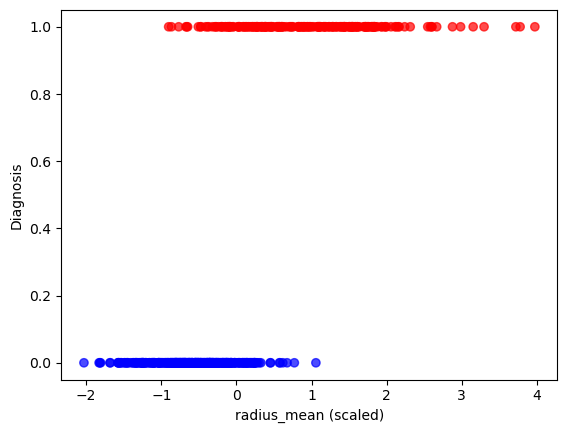

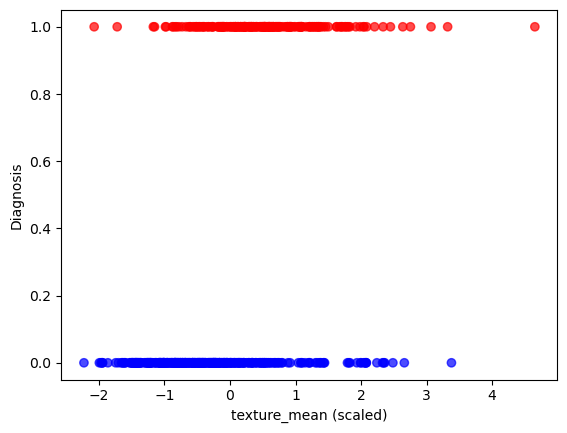

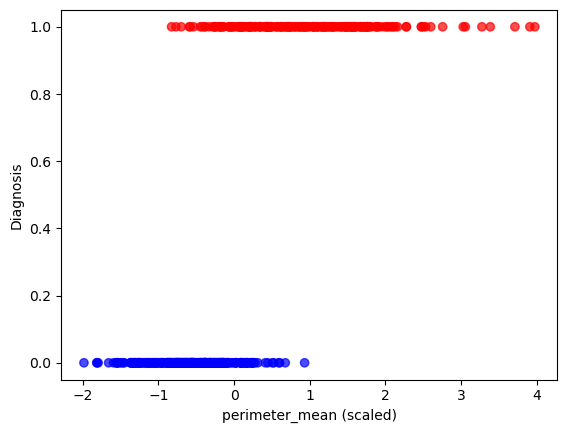

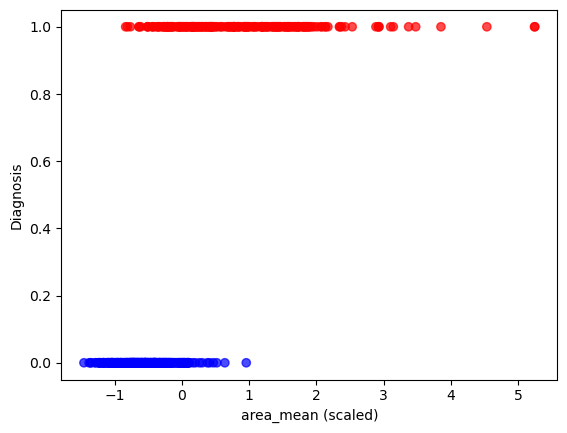

In [181]:
# WE ARE LOOKING THE RELATIONSHIP THROUGH TO SCATTERING

import matplotlib.pyplot as plt

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

features = ['radius_mean','texture_mean','perimeter_mean','area_mean']
for feature in features:
    plt.scatter(X_scaled_df[feature], y_numeric, c=y_numeric, cmap='bwr', alpha=0.7)
    plt.xlabel(feature + " (scaled)")
    plt.ylabel('Diagnosis')
    plt.show()


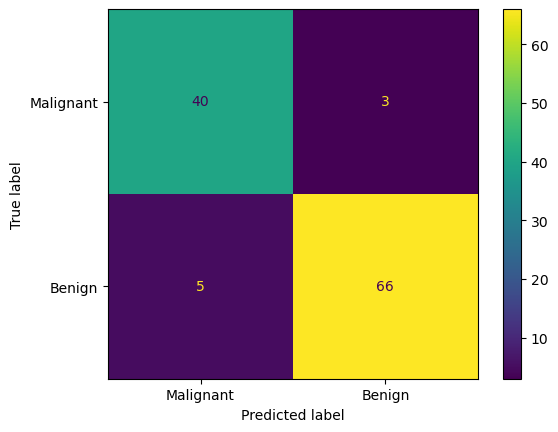

In [182]:
# 🔟 Confusion matrix for perfomance of the model
cm = confusion_matrix(y_test,PRICE, labels=[1,0])  # 1=Malignant, 0=Benign
disp = ConfusionMatrixDisplay(cm, display_labels=['Malignant','Benign'])
disp.plot()


In [183]:
#perfoming the predictions
new_sample = [[14.2, 20.1, 90.5, 600.0]]  # radius_mean, texture_mean, perimeter_mean, area_mean

prediction =SVC_model.predict(new_sample)

print("Prediction for new sample:", prediction) 

Prediction for new sample: [1]


In [184]:
#we used the approch becouse it is a classifier type (1,0)
accuracy = accuracy_score(y_test_enc, PRICE)
precision = precision_score(y_test_enc, PRICE)
recall = recall_score(y_test_enc, PRICE)
f1 = f1_score(y_test_enc, PRICE)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9298245614035088
Precision: 0.8888888888888888
Recall: 0.9302325581395349
F1-score: 0.9090909090909091


In [185]:
#naming new model and saving it for future purpose
filename = 'GROUP_6.pkl'
with open(filename, 'wb') as file:  # wb = write binary
    pickle.dump(SVC_model, file)

print(f"Model saved successfully as {filename}")



Model saved successfully as GROUP_6.pkl


loading the model

In [186]:

import pickle


# Load the saved model
with open('GROUP_6.pkl', 'rb') as file:  # make sure you use .pkl extension
    loaded_model = pickle.load(file)

print("Model loaded successfully ✅")



Model loaded successfully ✅


In [187]:
#prediction for new model
new_sample = [[14.2, 20.1, 90.5, 600.0]]  # radius_mean, texture_mean, perimeter_mean, area_mean

prediction =   loaded_model .predict(new_sample)

print("Prediction for new sample:", prediction)

Prediction for new sample: [1]
